In [20]:
library(mclust)
library(factoextra)
library(cluster)

In [6]:
old_data <- read.csv(file = '/home/colton/PycharmProjects/soundscapes/indices_with_clusters.csv')
old_data$acoustic_evenness....double..<-NULL
old_data$spectral_entropy....double..<-NULL
old_data[,7:14]<- scale(old_data[,7:14])
unique(old_data$Site)
head(old_data)


[1] Audubon_Society   Biosphere_2       Chuparosa_Inn     Desert_museum    
 [5] Empire_Ranch      Gates_Pass        Jake_NA           Nirav_NA         
 [9] Patagonia_lake    Paton_Hummingbird Proctor_road      Ruth_NA          
[13] Sabino_canyon     Saguaro_NP        Silvestrer_Spring Sweetwater_NA    
[17] Theresa_NA        Tumamoc_NA       
18 Levels: Audubon_Society Biosphere_2 Chuparosa_Inn ... Tumamoc_NA

,Site,Date....as.Date.character....format.....Y..m..d..,Time....character..,Name....character..,File_Start_Time....character..,File_End_Time....character..,bioacoustic....double..,amplitude....double..,temporal_entropy....double..,acoustic_entropy....double..,acoustic_diversity....double..,acoustic_complexity....double..,nrows....integer..,ndsi....double..,cluster..nine..clusters,cluster..fifteen..clusters
,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,Audubon_Society,2019-04-18,11:12:36,Audubon_Society_S4A07275_20190418_111236.wav,0,5,-1.15128774,0.05357391,-1.02517852,1.657195,1.725522,2.431469,0.7502799,0.3758906,4,5
2,Audubon_Society,2019-04-18,11:17:36,Audubon_Society_S4A07275_20190418_111236.wav,5,10,-0.58359367,0.22106740,-0.97234193,1.619785,1.657601,2.757101,-0.3177701,0.9984916,4,5
3,Audubon_Society,2019-04-18,11:22:36,Audubon_Society_S4A07275_20190418_111236.wav,10,15,-0.04681131,1.22597713,-0.08918344,1.579793,1.622160,2.445764,-0.3177701,0.5591209,4,5
4,Audubon_Society,2019-04-18,11:27:36,Audubon_Society_S4A07275_20190418_111236.wav,15,20,0.97787851,0.75623775,0.18785748,1.469510,1.660114,3.546632,-0.3177701,0.9850234,4,7
5,Audubon_Society,2019-04-18,11:32:36,Audubon_Society_S4A07275_20190418_111236.wav,20,25,-0.25463050,0.96572811,-0.02815722,1.601009,1.606197,2.642051,0.7502799,0.4885602,4,5
6,Audubon_Society,2019-04-18,11:37:36,Audubon_Society_S4A07275_20190418_111236.wav,25,30,1.11485166,0.05861859,-0.19222905,1.608395,1.370288,2.052151,-0.3177701,0.7700507,1,7


In [3]:
new_data <- read.csv(file = '/media/colton/My Passport/jake_lockdown.csv')
new_data$acoustic_evenness....double..<-NULL
new_data$spectral_entropy....double..<-NULL
new_data[,4:11]<- scale(new_data[,4:11])
head(new_data)

,Site,Date....as.Date.character....format.....Y..m..d..,Time....character..,bioacoustic....double..,amplitude....double..,temporal_entropy....double..,acoustic_entropy....double..,acoustic_diversity....double..,acoustic_complexity....double..,nrows....double..,ndsi....double..
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,S4A07341_20200425_150748.wav,2020-04-25,15:7:48,-0.03739256,0.4914947,-1.3783403,-0.221218831,-1.0489085,-0.2522929,-0.3889824,0.01150327
2,S4A07341_20200425_150748.wav,2020-04-25,15:12:48,0.02435816,0.6322092,-2.3649393,-0.904553006,-0.9794271,-0.1515380,-0.3889824,0.14803488
3,S4A07341_20200425_150748.wav,2020-04-25,15:17:48,-0.03188083,0.9421197,-1.7675389,-0.866686132,-1.1038714,-0.5436540,-0.3889824,-0.53824260
4,S4A07341_20200425_150748.wav,2020-04-25,15:22:48,0.08385346,0.7232758,-1.6559800,-0.006147892,-0.9951104,-0.3994346,-0.3889824,-0.34232051
5,S4A07341_20200425_150748.wav,2020-04-25,15:27:48,-0.26395988,1.6532576,-3.5128102,-1.439463097,-1.1344090,-0.3158087,-0.3889824,-0.21878164
6,S4A07341_20200425_150748.wav,2020-04-25,15:32:48,-0.16282745,-0.3758349,0.1331966,-0.177260449,-0.9988549,-0.3643071,-0.3889824,-0.41511651


In [55]:


euclidean <- function(cluster,center,clust_num) {
    square_dist <- 0
    for (index in 7:14) {
        square_dist <- square_dist + (as.numeric(as.character(cluster[,6+index]))-as.numeric(as.character(center[clust_num,index])))^2
    }
    return(sqrt(square_dist))
}

In [56]:
centers <- data.frame(matrix(ncol = 9, nrow = 9))
colnames(centers)<-c("center",colnames(new_data)[4:11])
for (i in 1:9) {
    cluster <- old_data[old_data$cluster..nine..clusters == i, ]
    centers[i,]<-c(i,apply(cluster[7:14],2,mean))
    }
head(centers,10)

,center,bioacoustic....double..,amplitude....double..,temporal_entropy....double..,acoustic_entropy....double..,acoustic_diversity....double..,acoustic_complexity....double..,nrows....double..,ndsi....double..
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.9454933,-0.34890903,0.6912416,0.28609695,0.7409203,1.0057635,-0.139877109,0.58820122
2,2,-1.2705198,0.64263252,-0.1146382,2.17696977,1.8648469,-0.3226738,6.710862180,1.09717760
3,3,0.4052994,-0.11015385,0.2316762,-0.02192006,-0.5565527,-0.3944623,-0.183367290,-1.06998540
4,4,-0.8733948,-0.02741947,-0.8745066,1.56303150,1.6875913,1.8225077,0.002277056,1.03225437
5,5,0.7191655,-0.31321054,0.5936318,0.60608401,0.6742200,-0.6016628,0.186993287,0.78606794
6,6,-1.1971618,-0.54163608,0.9481534,-1.04826707,-0.6984084,-0.6052543,-0.211454690,-0.08190909
7,7,-1.1588903,0.33421311,-0.1455586,1.23195864,1.1187113,-0.8287789,0.341653519,1.14038939
8,8,-0.5434016,5.37058373,0.1466852,-1.23333874,-0.6579359,1.6960586,-0.293947405,-0.41242597
9,9,-0.1347080,0.20304265,-1.2962820,-0.97388532,-0.8559227,0.3296754,-0.292669452,-0.36994921


In [57]:
old_data$distance_from_center<-NA
for (i in 1:9){
    for (j in 1:nrow(old_data)){
        if (old_data[j,"cluster..nine..clusters"]==i){
            d<-centers[i,2:9]- old_data[j,7:14]
            old_data[j,"distance_from_center"]<-sqrt(sum(d^2))
            if (is.na(sqrt(sum(d^2)))){
                print(cluster)
            }
        }
        
    }
    
}
#head(old_data)

In [58]:
new_data$proximity_percentage<- NA
new_data$hypothetical_cluster<-NA
for (j in 1:nrow(new_data)){
    best_cluster<- 1
    best_d <- 1000000
    proximity_percentage <- 0
    for(i in 1:9){
        d<- centers[i,2:9]- new_data[j,4:11]
        dist_to_center <- sqrt(sum(d^2))
        cluster <- old_data[old_data$cluster..nine..clusters == i, ]
        num_farther<- 0
        for (k in 1:nrow(cluster)){
            if (dist_to_center > cluster[k,"distance_from_center"]){
                num_farther<- num_farther+1
            }
            if (dist_to_center < best_d) {
                best_d <- dist_to_center
                best_cluster<- i
            }
        }
        cluster_proximity<- num_farther/nrow(cluster)
    }
    if (cluster_proximity > proximity_percentage){
        proximity_percentage <- cluster_proximity
    }
    new_data[j,"proximity_percentage"]<-proximity_percentage
    new_data[j,"hypothetical_cluster"]<-best_cluster
}
head(new_data)
write.csv(new_data,"jake_data_proximity_analysis.csv", row.names = FALSE)

,Site,Date....as.Date.character....format.....Y..m..d..,Time....character..,bioacoustic....double..,amplitude....double..,temporal_entropy....double..,acoustic_entropy....double..,acoustic_diversity....double..,acoustic_complexity....double..,nrows....double..,ndsi....double..,proximity_percentage,hypothetical_cluster
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,S4A07341_20200425_150748.wav,2020-04-25,15:7:48,-0.03739256,0.4914947,-1.3783403,-0.221218831,-1.0489085,-0.2522929,-0.3889824,0.01150327,0.1594005,9
2,S4A07341_20200425_150748.wav,2020-04-25,15:12:48,0.02435816,0.6322092,-2.3649393,-0.904553006,-0.9794271,-0.1515380,-0.3889824,0.14803488,0.3664850,9
3,S4A07341_20200425_150748.wav,2020-04-25,15:17:48,-0.03188083,0.9421197,-1.7675389,-0.866686132,-1.1038714,-0.5436540,-0.3889824,-0.53824260,0.2970027,9
4,S4A07341_20200425_150748.wav,2020-04-25,15:22:48,0.08385346,0.7232758,-1.6559800,-0.006147892,-0.9951104,-0.3994346,-0.3889824,-0.34232051,0.3862398,9
5,S4A07341_20200425_150748.wav,2020-04-25,15:27:48,-0.26395988,1.6532576,-3.5128102,-1.439463097,-1.1344090,-0.3158087,-0.3889824,-0.21878164,0.9655995,9
6,S4A07341_20200425_150748.wav,2020-04-25,15:32:48,-0.16282745,-0.3758349,0.1331966,-0.177260449,-0.9988549,-0.3643071,-0.3889824,-0.41511651,0.7200272,3


In [59]:
analysis_data <- read.csv(file = "jake_data_proximity_analysis.csv")
head(analysis_data)

,Site,Date....as.Date.character....format.....Y..m..d..,Time....character..,bioacoustic....double..,amplitude....double..,temporal_entropy....double..,acoustic_entropy....double..,acoustic_diversity....double..,acoustic_complexity....double..,nrows....double..,ndsi....double..,proximity_percentage,hypothetical_cluster
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,S4A07341_20200425_150748.wav,2020-04-25,15:7:48,-0.03739256,0.4914947,-1.3783403,-0.221218831,-1.0489085,-0.2522929,-0.3889824,0.01150327,0.1594005,9
2,S4A07341_20200425_150748.wav,2020-04-25,15:12:48,0.02435816,0.6322092,-2.3649393,-0.904553006,-0.9794271,-0.1515380,-0.3889824,0.14803488,0.3664850,9
3,S4A07341_20200425_150748.wav,2020-04-25,15:17:48,-0.03188083,0.9421197,-1.7675389,-0.866686132,-1.1038714,-0.5436540,-0.3889824,-0.53824260,0.2970027,9
4,S4A07341_20200425_150748.wav,2020-04-25,15:22:48,0.08385346,0.7232758,-1.6559800,-0.006147892,-0.9951104,-0.3994346,-0.3889824,-0.34232051,0.3862398,9
5,S4A07341_20200425_150748.wav,2020-04-25,15:27:48,-0.26395988,1.6532576,-3.5128102,-1.439463097,-1.1344090,-0.3158087,-0.3889824,-0.21878164,0.9655995,9
6,S4A07341_20200425_150748.wav,2020-04-25,15:32:48,-0.16282745,-0.3758349,0.1331966,-0.177260449,-0.9988549,-0.3643071,-0.3889824,-0.41511651,0.7200272,3


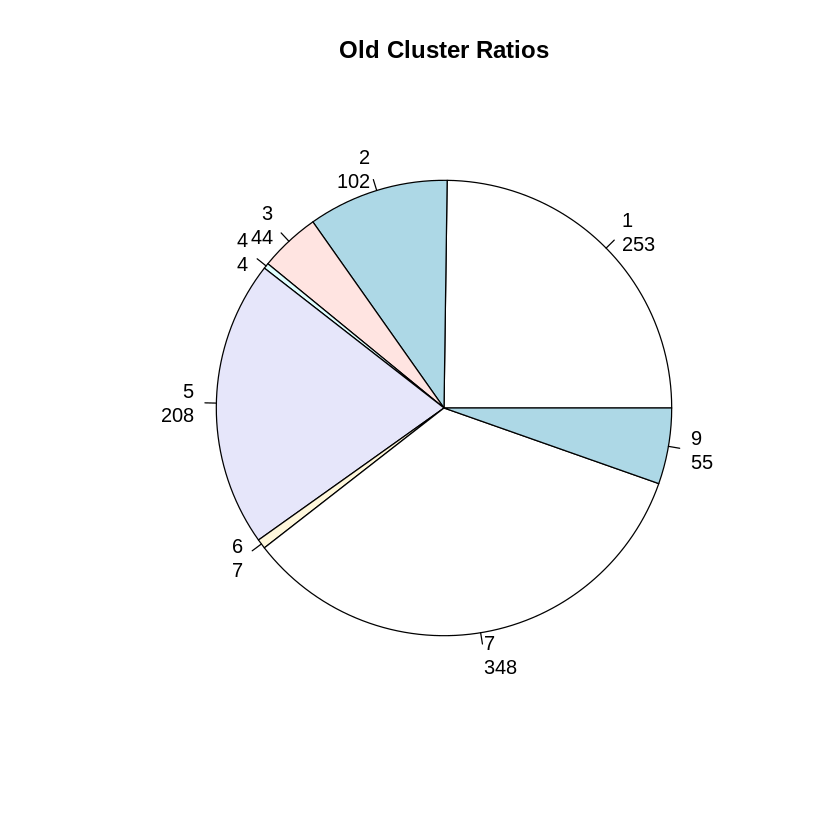

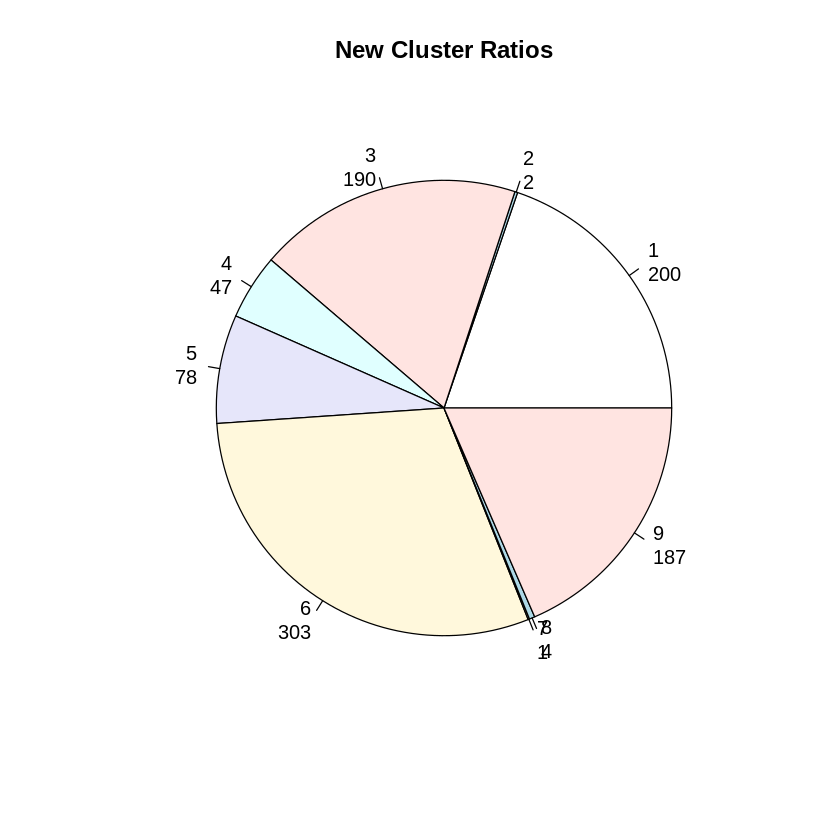

In [60]:
old_data<-old_data[which(old_data$Site=="Jake_NA"),]
oldtable<-table(old_data$cluster..nine..clusters)
lbls <- paste(names(oldtable), "\n", oldtable, sep="")
pie(oldtable, labels = lbls,
   main="Old Cluster Ratios")
newtable<-table(analysis_data$hypothetical_cluster)
lbls <- paste(names(newtable), "\n", newtable, sep="")
pie(newtable, labels = lbls,
   main="New Cluster Ratios") 

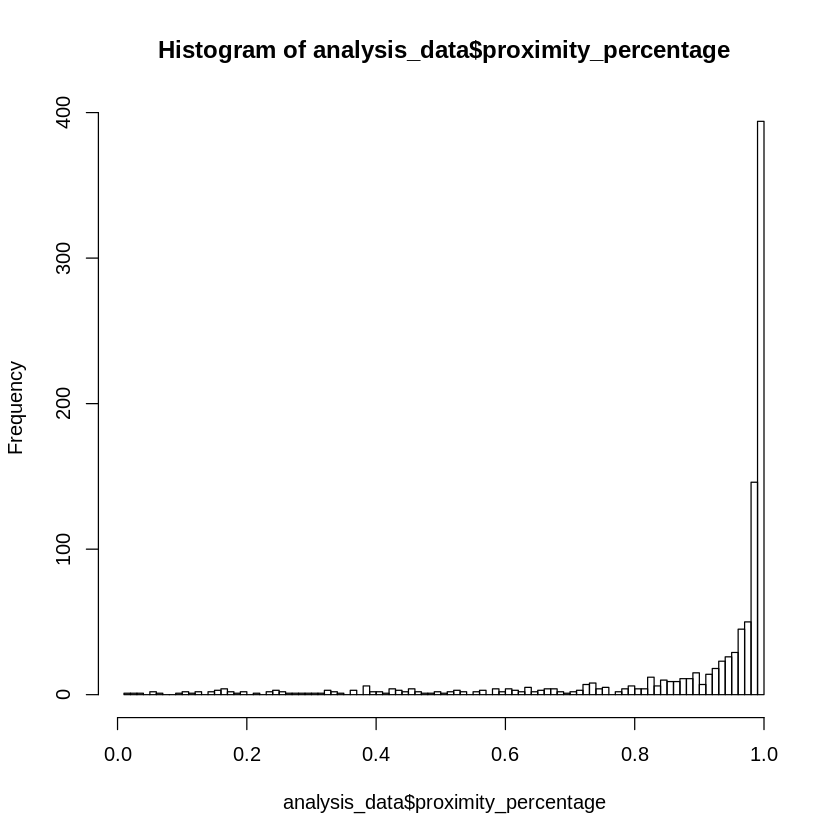

In [61]:
hist(analysis_data$proximity_percentage,breaks=100)

In [4]:
names(new_data)[names(new_data) == "nrows....double.."] <- "nrows....integer.."

In [13]:
total <- rbind(old_data[7:14], new_data[4:11]) 
fit <- kmeans(total,9,iter.max=30)
fit$size
fit$centers
added_post_clustering <- data.frame(old_data, fit$cluster[1:nrow(old_data)])
head(added_post_clustering)

[1]  201 1052  276 1084 1375 2444 3369 1832 3472

,bioacoustic....double..,amplitude....double..,temporal_entropy....double..,acoustic_entropy....double..,acoustic_diversity....double..,acoustic_complexity....double..,nrows....integer..,ndsi....double..
1,-1.2554382,0.64986048,-0.1260974,2.18158048,1.8658462,-0.28567042,6.68368464,1.1069935
2,-0.3961182,0.02212131,-0.5900112,1.53621283,1.7113843,1.97789111,0.02111208,1.0500088
3,-0.5429910,5.33453351,0.1186325,-1.20863471,-0.6468242,1.65313007,-0.28517295,-0.3993955
4,-1.0507403,0.17892515,0.0500708,1.21770886,1.0756502,-0.92259357,0.39575487,1.1583843
5,0.2611721,0.09404079,-0.9917294,-0.40170308,-0.3645638,0.27496925,-0.15404953,0.7586567
6,-0.2625558,0.23805172,-1.3128118,-1.02975270,-0.9588721,0.24216678,-0.30380321,-0.6952050
7,0.8753429,-0.31686428,0.7404068,0.54119389,0.7898871,0.03175649,0.07427148,0.6858891
8,-1.1652998,-0.59725391,0.9514895,-1.00042081,-0.6365048,-0.66850881,-0.23937560,-0.2525517
9,0.4108011,-0.10645140,0.2573730,0.01081199,-0.5222312,-0.38355760,-0.16511879,-1.0555092


,Site,Date....as.Date.character....format.....Y..m..d..,Time....character..,Name....character..,File_Start_Time....character..,File_End_Time....character..,bioacoustic....double..,amplitude....double..,temporal_entropy....double..,acoustic_entropy....double..,acoustic_diversity....double..,acoustic_complexity....double..,nrows....integer..,ndsi....double..,cluster..nine..clusters,cluster..fifteen..clusters,fit.cluster.1.nrow.old_data..
,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,Audubon_Society,2019-04-18,11:12:36,Audubon_Society_S4A07275_20190418_111236.wav,0,5,-1.15128774,0.05357391,-1.02517852,1.657195,1.725522,2.431469,0.7502799,0.3758906,4,5,2
2,Audubon_Society,2019-04-18,11:17:36,Audubon_Society_S4A07275_20190418_111236.wav,5,10,-0.58359367,0.22106740,-0.97234193,1.619785,1.657601,2.757101,-0.3177701,0.9984916,4,5,2
3,Audubon_Society,2019-04-18,11:22:36,Audubon_Society_S4A07275_20190418_111236.wav,10,15,-0.04681131,1.22597713,-0.08918344,1.579793,1.622160,2.445764,-0.3177701,0.5591209,4,5,2
4,Audubon_Society,2019-04-18,11:27:36,Audubon_Society_S4A07275_20190418_111236.wav,15,20,0.97787851,0.75623775,0.18785748,1.469510,1.660114,3.546632,-0.3177701,0.9850234,4,7,2
5,Audubon_Society,2019-04-18,11:32:36,Audubon_Society_S4A07275_20190418_111236.wav,20,25,-0.25463050,0.96572811,-0.02815722,1.601009,1.606197,2.642051,0.7502799,0.4885602,4,5,2
6,Audubon_Society,2019-04-18,11:37:36,Audubon_Society_S4A07275_20190418_111236.wav,25,30,1.11485166,0.05861859,-0.19222905,1.608395,1.370288,2.052151,-0.3177701,0.7700507,1,7,2


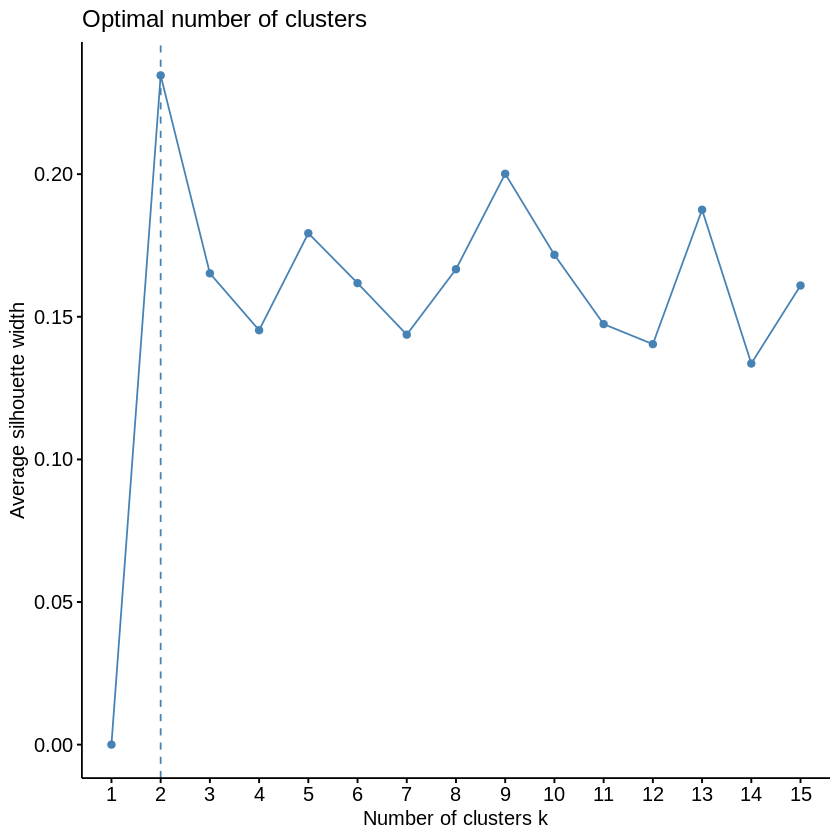

In [21]:
fviz_nbclust(total,FUNcluster=clara ,method = "silhouette",k.max=15,verbose=TRUE)

,bioacoustic....double..,amplitude....double..,temporal_entropy....double..,acoustic_entropy....double..,acoustic_diversity....double..,acoustic_complexity....double..,nrows....integer..,ndsi....double..
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.15128774,0.05357391,-1.02517852,1.657195,1.725522,2.431469,0.7502799,0.3758906
2,-0.58359367,0.22106740,-0.97234193,1.619785,1.657601,2.757101,-0.3177701,0.9984916
3,-0.04681131,1.22597713,-0.08918344,1.579793,1.622160,2.445764,-0.3177701,0.5591209
4,0.97787851,0.75623775,0.18785748,1.469510,1.660114,3.546632,-0.3177701,0.9850234
5,-0.25463050,0.96572811,-0.02815722,1.601009,1.606197,2.642051,0.7502799,0.4885602
6,1.11485166,0.05861859,-0.19222905,1.608395,1.370288,2.052151,-0.3177701,0.7700507
